# Étiquetage des catégories construites

In [2]:
from src.labeling_constructed_categories import *

## Chargement des données

In [3]:
# 1. Chargement des données
input_file = "articles_with_clusters.pkl"  # Adaptez ce chemin
df = load_processed_data(input_file)

Données chargées avec succès. Shape: (23702, 13)


## Identification de la colonne de cluster

In [4]:
# 2. Identification de la colonne de cluster
cluster_column = identify_cluster_column(df)
print(f"Colonne de cluster identifiée: {cluster_column}")

Colonne de cluster identifiée: cluster_kmeans_8_doc2vec


## Préparation des données

In [5]:
# 3. Préparation des données
df = prepare_texts(df)

## Création et utilisation du labeler

In [6]:
# 4. Création et utilisation du labeler
labeler = CategoryLabeler(df, cluster_column)

Nombre de clusters: 8
Préparation des textes par cluster...


## Extraction des termes fréquents

In [7]:
# 5. Extraction des termes fréquents
frequent_terms = labeler.extract_frequent_terms(min_df=2, max_df=0.95, top_n=50)


Extraction des termes les plus fréquents par cluster...


100%|██████████| 8/8 [00:20<00:00,  2.54s/it]


## Extraction des collocations

In [8]:
# 6. Extraction des collocations
collocations = labeler.extract_cluster_collocations(n_collocations=30)


Extraction des collocations par cluster...


100%|██████████| 8/8 [00:07<00:00,  1.04it/s]


## Calcul des termes discriminants

In [9]:
# 7. Calcul des termes discriminants
discriminative_terms = labeler.calculate_discriminative_terms(use_tfidf=True, max_terms=50)


Calcul des termes discriminants par cluster...


100%|██████████| 8/8 [00:00<00:00, 214.19it/s]


## Recherche des documents centraux

In [10]:
# 8. Recherche des documents centraux
central_documents = labeler.find_central_documents(n_docs=5, use_tfidf=True)


Recherche des documents centraux par cluster...


100%|██████████| 8/8 [00:20<00:00,  2.56s/it]


## Création des étiquettes

In [11]:
# 9. Création des étiquettes
cluster_labels = labeler.create_cluster_labels(n_terms=5, use_discriminative=True)

# Affichage des étiquettes
print("\nÉtiquettes des clusters:")
for cluster_id, label in cluster_labels.items():
    print(f"- {label}")

Création des étiquettes de cluster...

Étiquettes des clusters:
- Cluster 0: simd, nvidia, pcb, nonvolatil, pae
- Cluster 1: aerosol, fbg, chlorophyl, raman, nanoparticl
- Cluster 2: thesauri, wc, hive, wareh, wot
- Cluster 3: ccn, dtn, icn, rsu, vg
- Cluster 4: girl, ideolog, morn, profess, spillov
- Cluster 5: poset, x_, semigroup, rung, cdot
- Cluster 6: minitrack, isbn, prefac, corrigendum, foreword
- Cluster 7: fcn, tagger, nmf, melanoma, rbm


## Visualisations

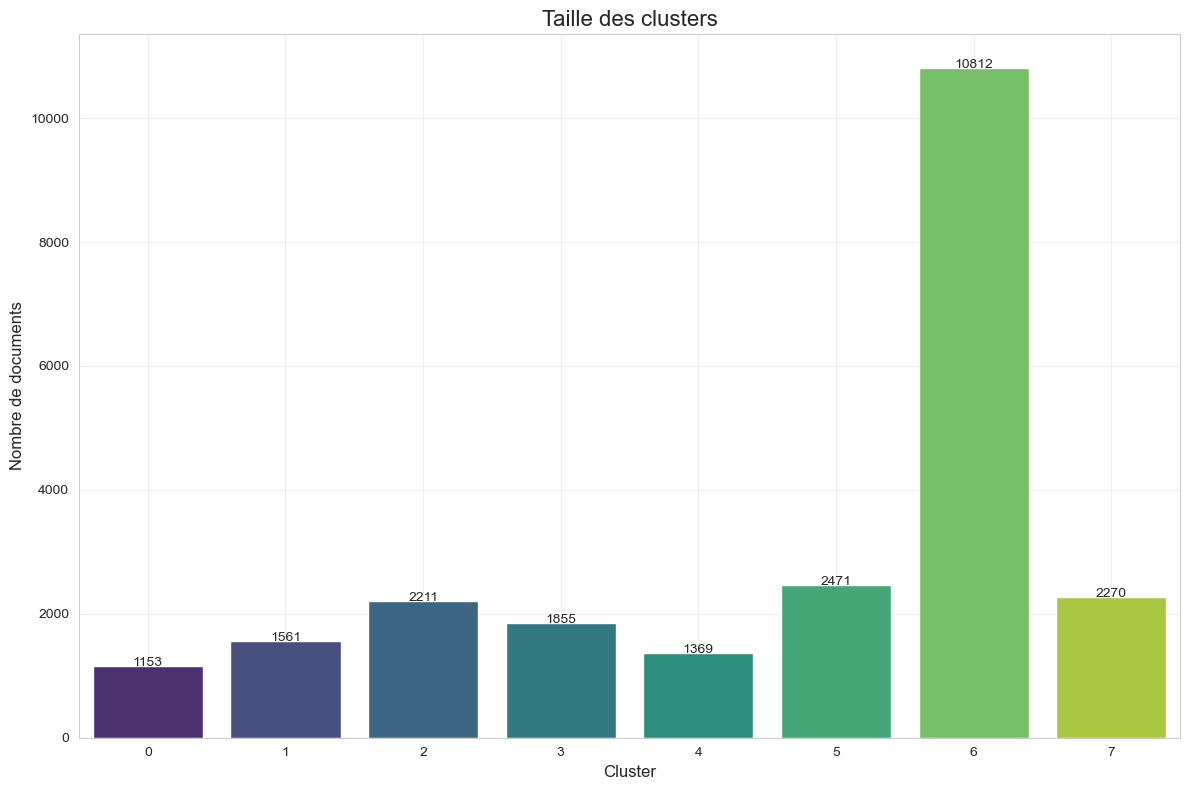

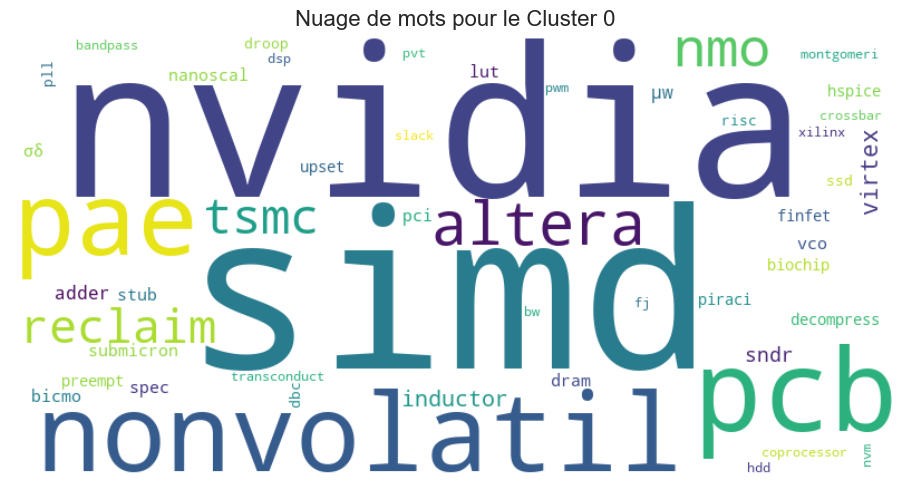

<Figure size 640x480 with 0 Axes>

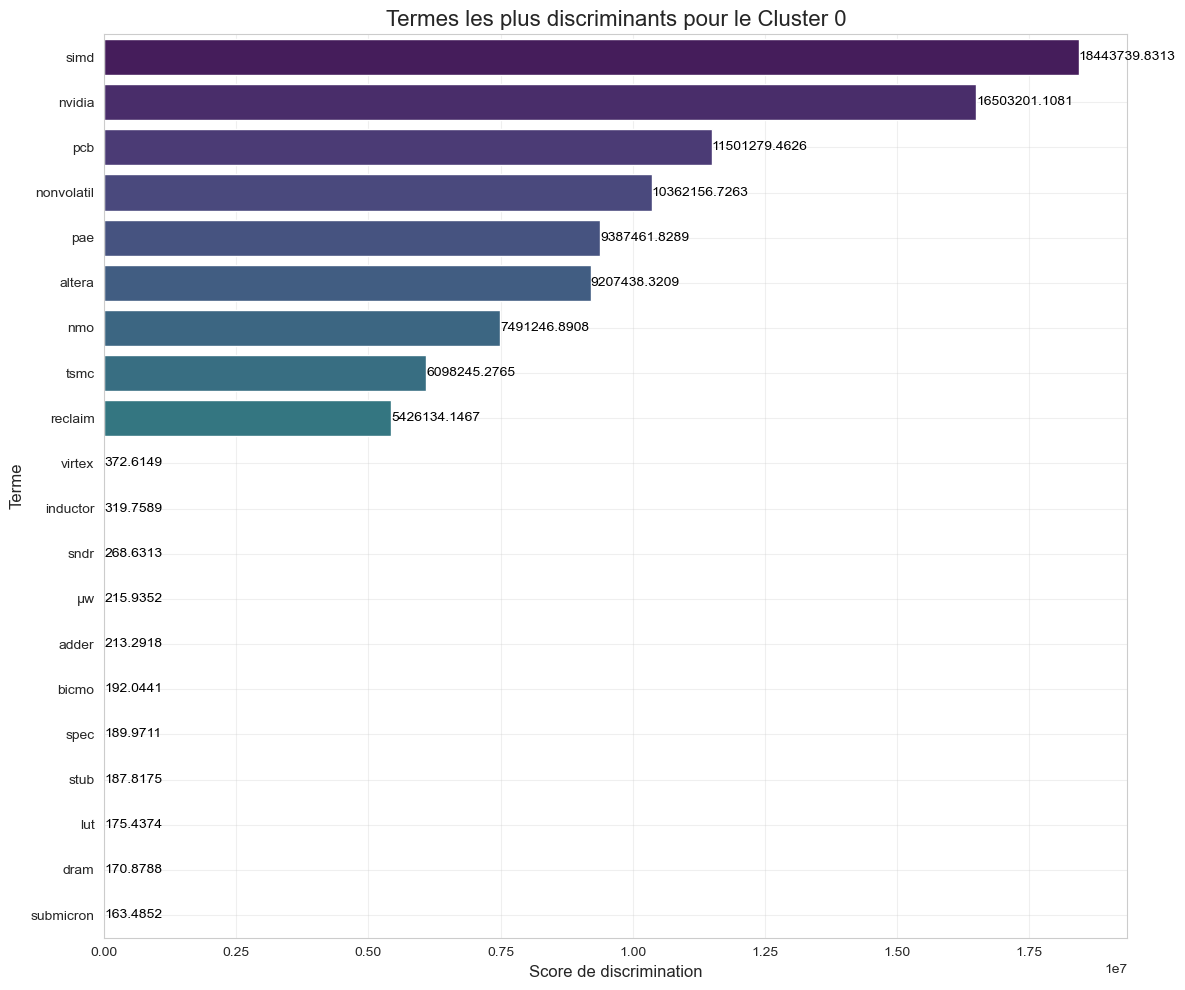

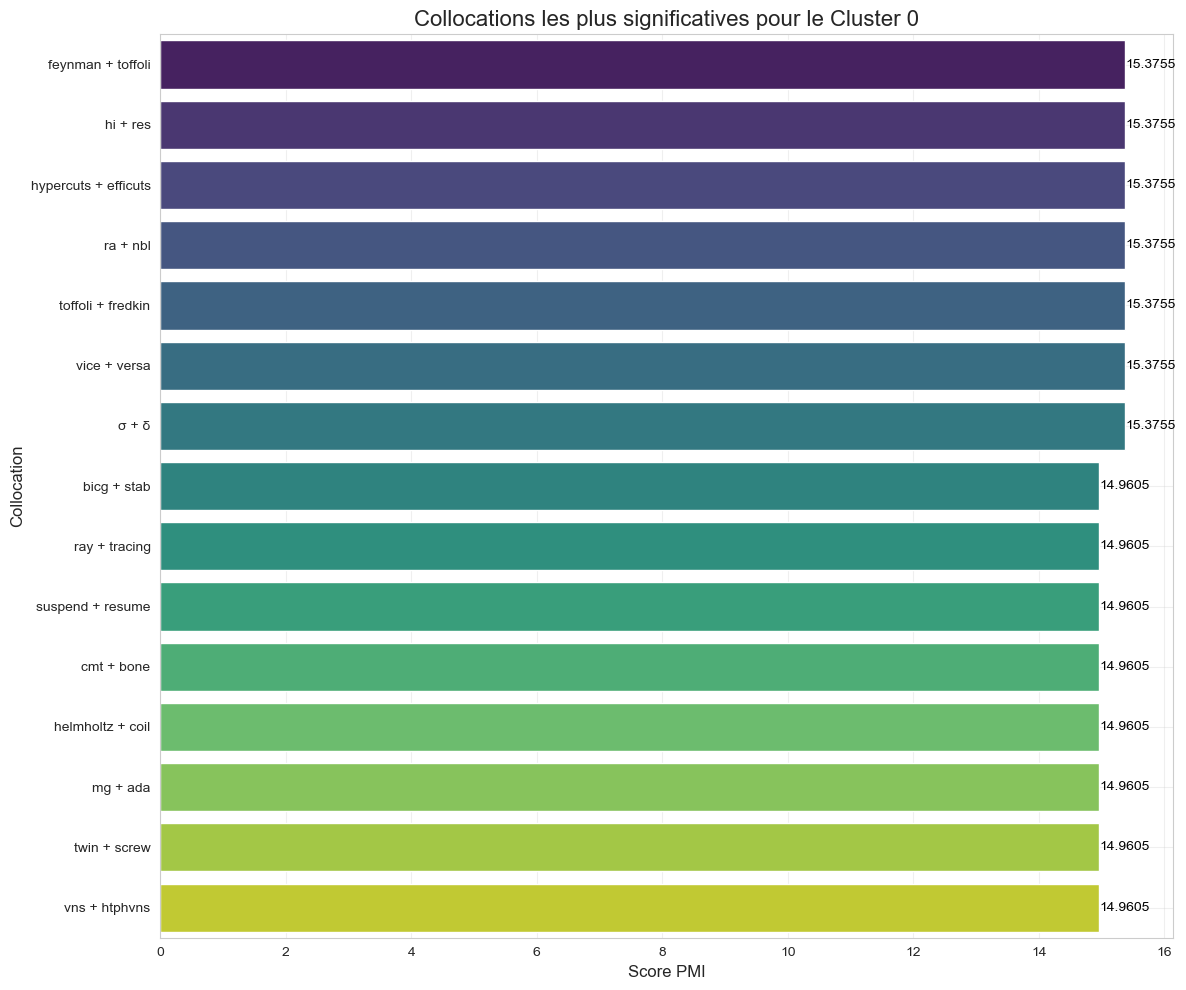

# Résumé du Cluster 0

## Informations générales
- Nombre de documents: 1153

## Termes les plus fréquents
- perform: 1248
- system: 1205
- power: 1019
- design: 1000
- time: 941
- comput: 841
- applic: 827
- effici: 722
- implement: 711
- memori: 681

## Termes les plus discriminants
- simd: 18443739.8313
- nvidia: 16503201.1081
- pcb: 11501279.4626
- nonvolatil: 10362156.7263
- pae: 9387461.8289
- altera: 9207438.3209
- nmo: 7491246.8908
- tsmc: 6098245.2765
- reclaim: 5426134.1467
- virtex: 372.6149

## Collocations significatives
- 'feynman toffoli': 15.3755
- 'hi res': 15.3755
- 'hypercuts efficuts': 15.3755
- 'ra nbl': 15.3755
- 'toffoli fredkin': 15.3755

## Documents les plus représentatifs

### Document 1 (similarité: 0.3812)
- Titre: Approximate computing: Design & test for integrated circuits
- Résumé: Todays' Integrated Circuits (ICs) are starting to reach the physical limits of CMOS technology. Among the multiple challenges arising from technology nodes lower than 20nm, we

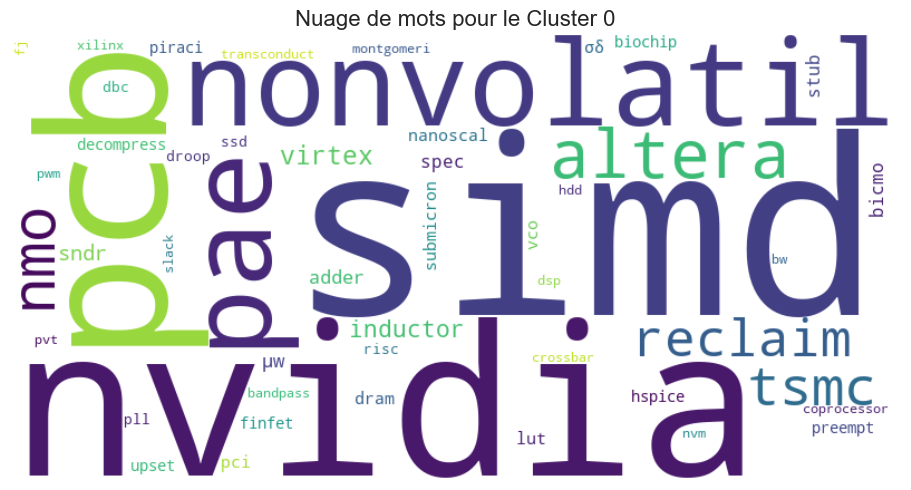

Création du nuage de mots pour le cluster 1...


<Figure size 640x480 with 0 Axes>

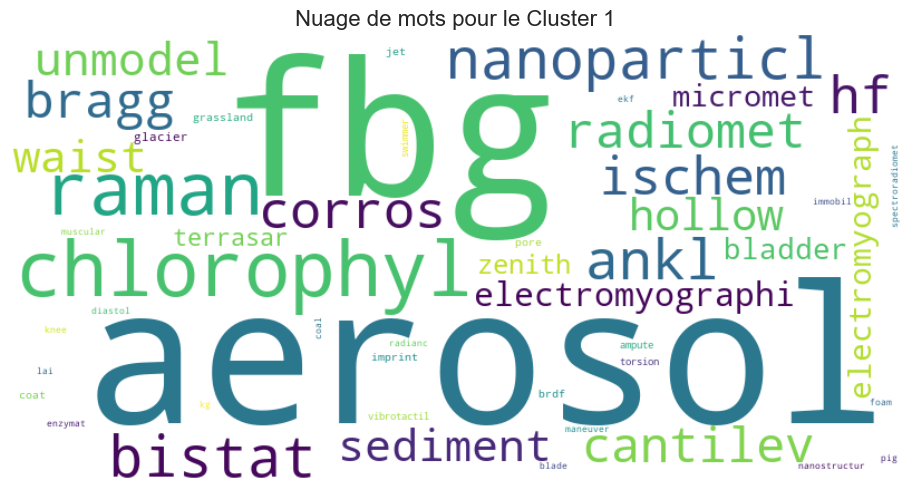

Création du nuage de mots pour le cluster 2...


<Figure size 640x480 with 0 Axes>

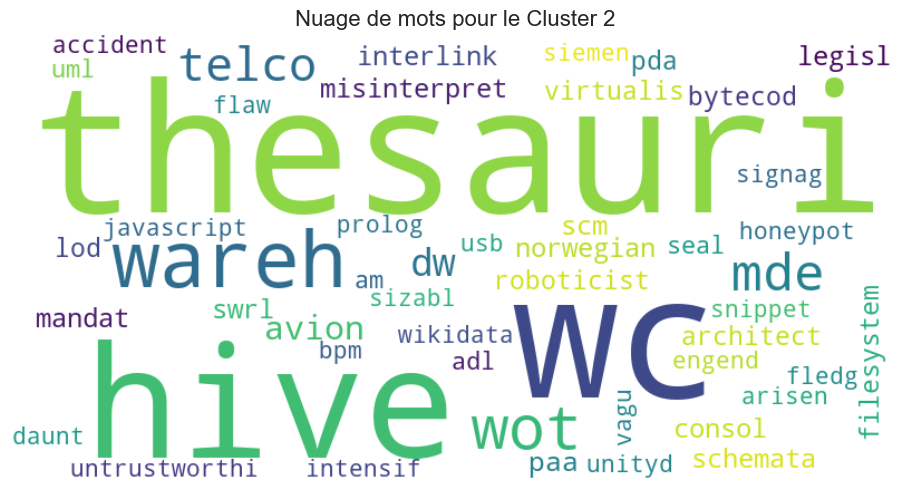

Création du nuage de mots pour le cluster 3...


<Figure size 640x480 with 0 Axes>

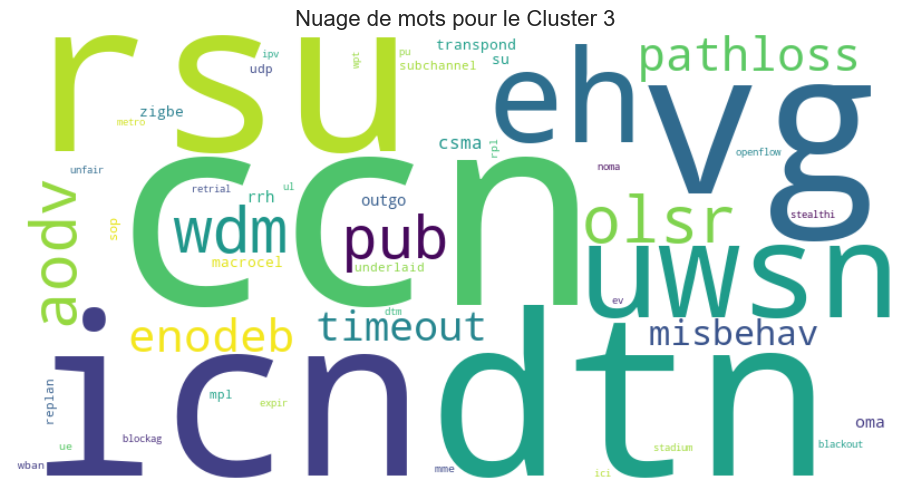

Création du nuage de mots pour le cluster 4...


<Figure size 640x480 with 0 Axes>

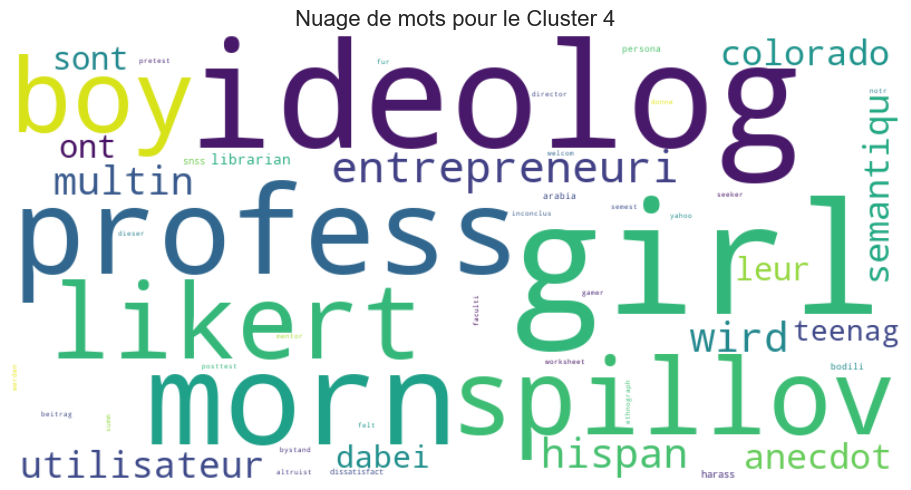

Création du nuage de mots pour le cluster 5...


<Figure size 640x480 with 0 Axes>

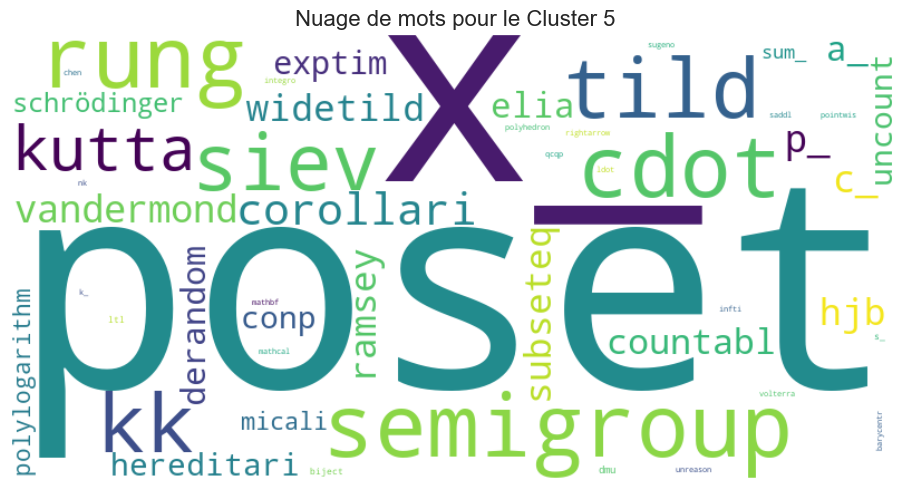

Création du nuage de mots pour le cluster 6...


<Figure size 640x480 with 0 Axes>

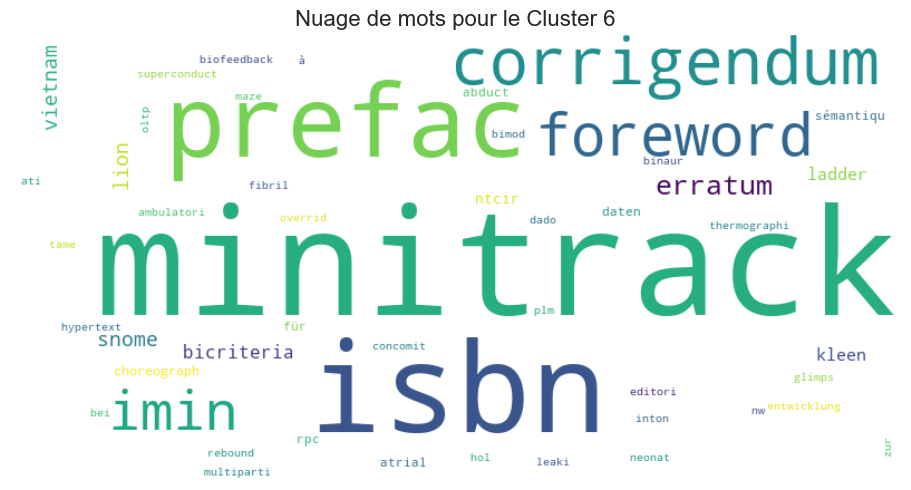

Création du nuage de mots pour le cluster 7...


<Figure size 640x480 with 0 Axes>

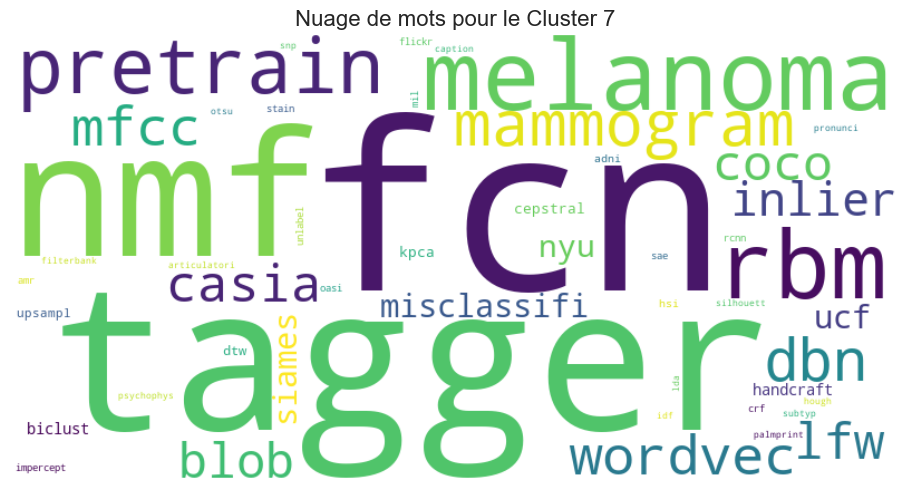

Nuages de mots enregistrés dans le répertoire 'cluster_wordclouds'
Rapport de synthèse enregistré dans 'cluster_summary.md'


'cluster_summary.md'

<Figure size 640x480 with 0 Axes>

In [12]:
# 10. Visualisations
visualizer = CategoryVisualizer(labeler)

# Taille des clusters
visualizer.plot_cluster_sizes()

# Choisir un cluster pour les visualisations
cluster_id = list(labeler.clusters)[0]  # Premier cluster

# Nuage de mots
visualizer.create_term_wordcloud(cluster_id, use_discriminative=True)

# Termes discriminants
visualizer.plot_discriminative_terms(cluster_id, n_terms=20)

# Collocations
visualizer.plot_collocation_graph(cluster_id, n_collocations=15)

# Création du rapport de synthèse pour un cluster
print(labeler.generate_cluster_summary(cluster_id))

# Création de tous les nuages de mots
visualizer.create_all_wordclouds(output_dir='cluster_wordclouds', use_discriminative=True)

# Création du rapport complet
visualizer.create_cluster_summary_report(output_file='cluster_summary.md')